In [8]:
# Basic data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Settings
plt.style.use('ggplot')
sns.set_palette("viridis")



In [11]:
# Load the CSV file
df = pd.read_csv('influencer_dataset.csv')

# Display the first few rows
df.head()


,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [15]:
# Step 3 - Clean and Convert 'followers' and '60_day_eng_rate'

# Remove commas and convert to float
df['followers'] = df['followers'].astype(str).str.replace(',', '').str.strip()

# Remove any suffixes like 'K', 'M' and convert to float
def convert_followers(val):
    val = val.upper().replace(',', '').strip()
    if 'K' in val:
        return float(val.replace('K', '')) * 1e3
    elif 'M' in val:
        return float(val.replace('M', '')) * 1e6
    elif 'B' in val:
        return float(val.replace('B', '')) * 1e9
    else:
        try:
            return float(val)
        except:
            return None

df['followers'] = df['followers'].apply(convert_followers)

# Convert engagement rate (removing % if present)
df['60_day_eng_rate'] = df['60_day_eng_rate'].astype(str).str.replace('%', '').str.strip()
df['60_day_eng_rate'] = pd.to_numeric(df['60_day_eng_rate'], errors='coerce')





In [16]:
df.dropna(subset=['channel_info', 'followers', '60_day_eng_rate'], inplace=True)

# Rename columns
df.rename(columns={
    'channel_info': 'username',
    '60_day_eng_rate': 'engagement_rate'
}, inplace=True)


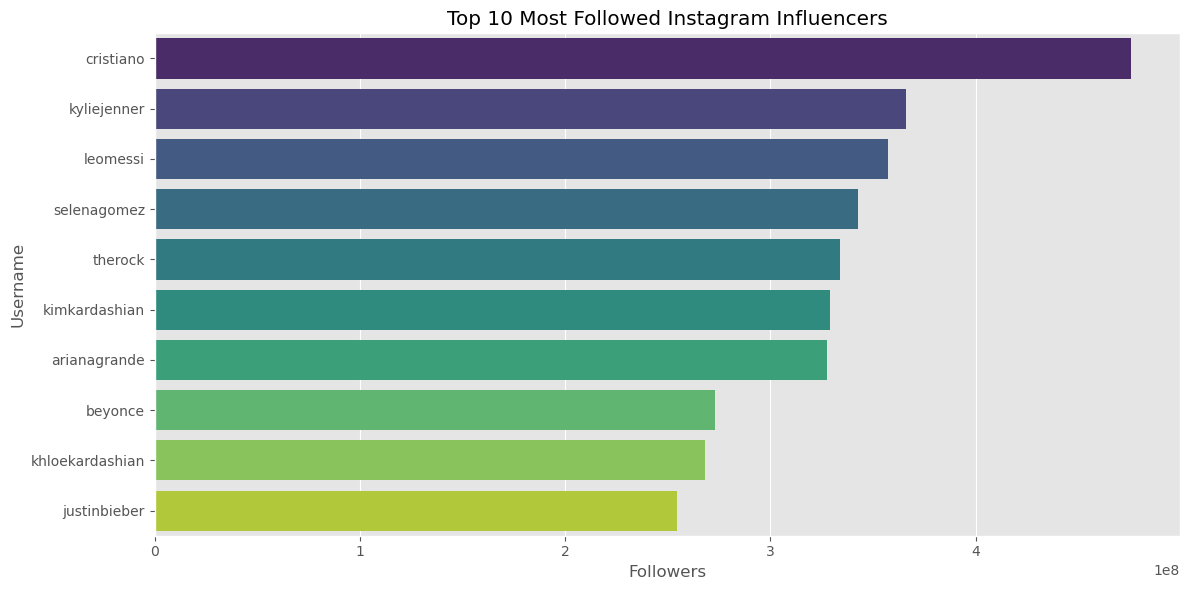

In [17]:
top_followed = df.sort_values(by='followers', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='followers', y='username', data=top_followed, palette='viridis')
plt.title("Top 10 Most Followed Instagram Influencers")
plt.xlabel("Followers")
plt.ylabel("Username")
plt.tight_layout()
plt.show()


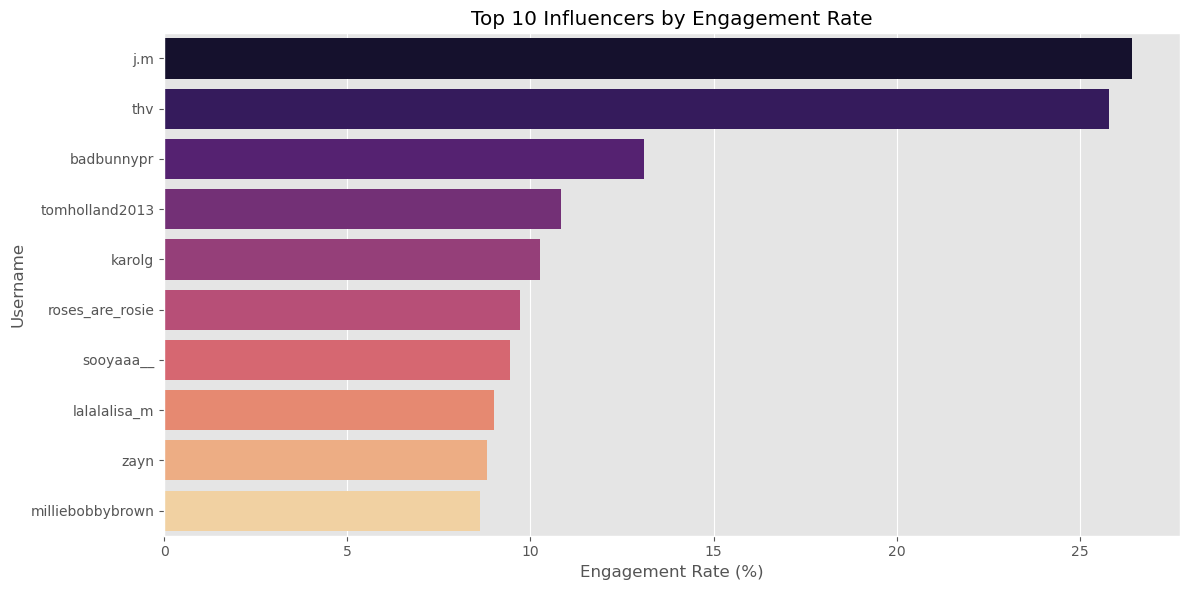

In [18]:
# Top 10 by engagement rate
top_engagement = df.sort_values(by='engagement_rate', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='engagement_rate', y='username', data=top_engagement, palette='magma')
plt.title("Top 10 Influencers by Engagement Rate")
plt.xlabel("Engagement Rate (%)")
plt.ylabel("Username")
plt.tight_layout()
plt.show()


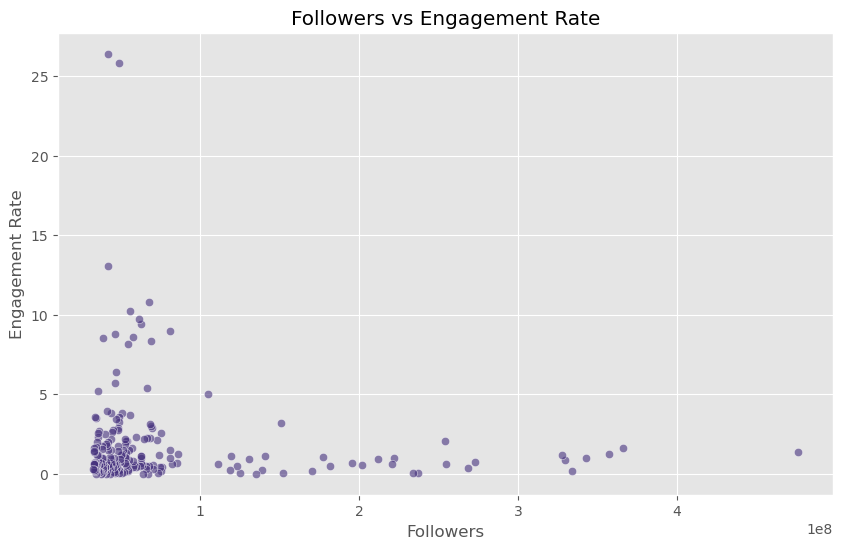

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='followers', y='engagement_rate', data=df, alpha=0.6)
plt.title("Followers vs Engagement Rate")
plt.xlabel("Followers")
plt.ylabel("Engagement Rate")
plt.grid(True)
plt.show()


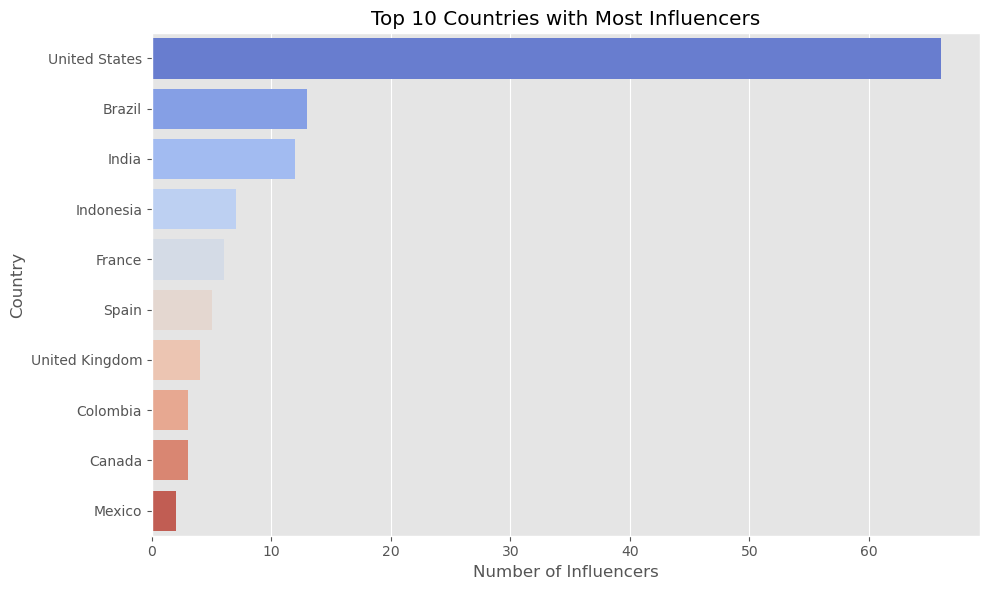

In [20]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")
plt.title("Top 10 Countries with Most Influencers")
plt.xlabel("Number of Influencers")
plt.ylabel("Country")
plt.tight_layout()
plt.show()
